# Visualising COVID

I started looking into the world COVID data out of curiosity. How is each country coping with the current pandemic? As I went through, I soon found that meaningful comparison is near impossible. There is still a great deal of uncertainty over the reported data from all countries, in both the developed and the developing world. There are different standards of reporting, different testing regimes, and unknows as to the percentage of asymptomatic cases might make up. At a later stage we may get more accurate data to enable effective analysis and comparison of countries and find out why there are such differences in cases and deaths. For now, I just wanted to take the opportunity to visualise some of the data available to us.

The dataset used is frequently updated and avalible here: https://dj2taa9i652rf.cloudfront.net/

In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

Reading data into a data frame. Having done this, I added a column - 'total cases minus deaths' - equalling the total cases in each country who had not succumb to the virus. Then I make a data frame which returns just the most recent data recorded, to give a snapshot of where we are right now. The data is 21/05/2020

In [2]:
df = pd.read_csv('covid-19-world-cases-deaths-testing.csv')

df['total_cases_minus_deaths'] = df.apply(lambda row: row['total_cases'] - row['total_deaths'], axis=1)

most_recent = df[df.date == '2020-05-21']

print(df.columns)

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'new_tests_smoothed', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed_per_thousand',
       'tests_units', 'stringency_index', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_100k', 'total_cases_minus_deaths'],
      dtype='object')


Having outlined my concerns for the accuracy of the data, it would be more useful to stick with country’s which have similar systems of testing and reporting in place. Below are the countries with the highest death rates per million of population. They are all relatively wealthy countries with similar testing systems being implemented.

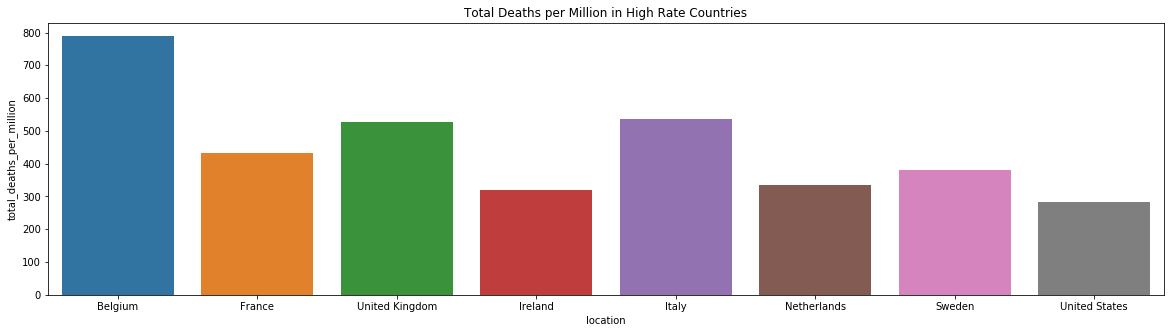

In [3]:
high_rates = most_recent[(most_recent.total_deaths_per_million > 200)& (most_recent.population >= 1000000)]
plt.figure(figsize=(20,5))
sns.barplot(data=high_rates, x='location', y='total_deaths_per_million')
plt.title('Total Deaths per Million in High Rate Countries')
plt.show()

If we now look at the lowest deathrates per million of population we can see that almost exclusivly they are either small or developing countrys. It may be true, that becuase some of these countries lack the same level of international travel of the above, that they have been spared the major spread of the virus before lockdown measures began to be put in place. It may also be due to a lack of reporting because of goverments and weak healthcare systems.

Text(0.5, 1.0, 'Total Deaths per Million in Low Rate Countries')

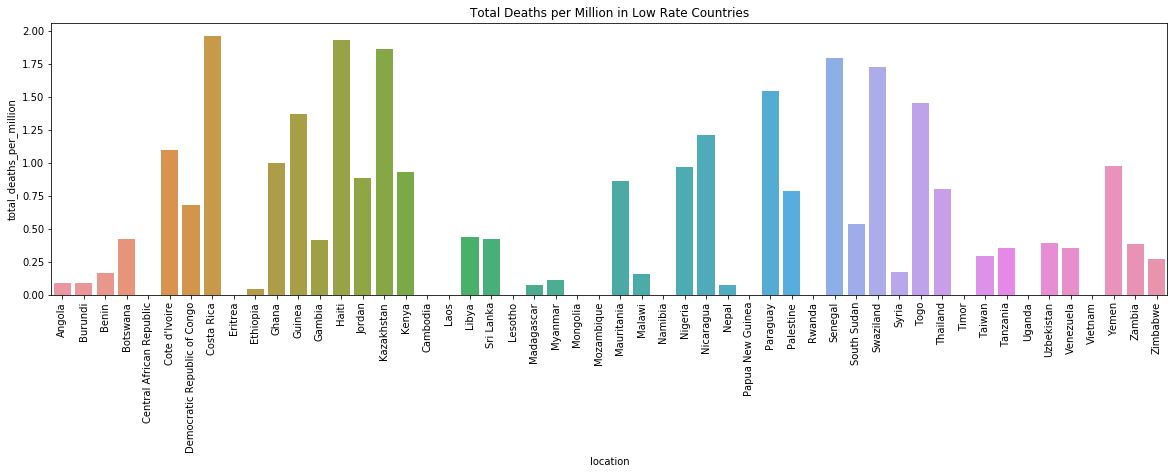

In [4]:
low_rates = df[(df.date == '2020-05-21') & (df.total_deaths_per_million < 2) & (df.population >= 1000000)]
plt.figure(figsize=(20,5))
sns.barplot(data=low_rates, x='location', y='total_deaths_per_million')
plt.xticks(rotation = 90)
plt.title('Total Deaths per Million in Low Rate Countries')

Deaths are far easier to spot and report than simply reporting cases. If a person is so ill they are dying, they are more likely to seek a hospital and then more likely to get reported and added to the data. Rich governments can spend more on wider testing of their population. If we assume this, then richer countries will be more likely to report higher cases, simply as they are being detected thanks to the wider general testing.

The data does seem to show some correlation with this hypothesise. Comparing total deaths with GDP shows no correlation but when looking at the total cases against GDP there is a weak positive correlation.

Text(0.5, 1.0, 'Total Cases per Million vs GDP')

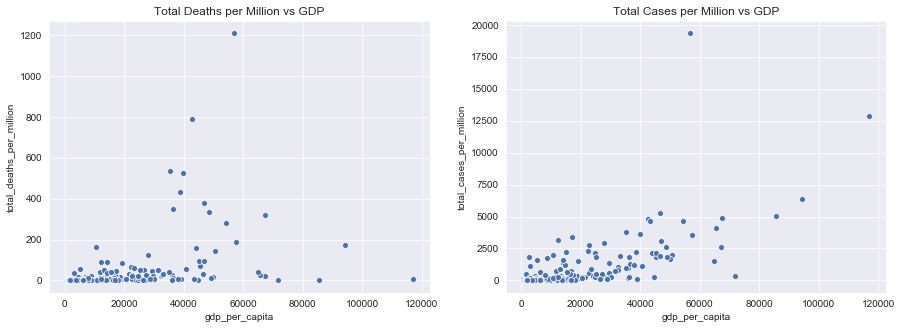

In [20]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.scatterplot(x='gdp_per_capita', y='total_deaths_per_million', data=most_recent)
plt.title('Total Deaths per Million vs GDP')
plt.subplot(1,2,2)
sns.scatterplot(x='gdp_per_capita', y='total_cases_per_million', data=most_recent )
plt.title('Total Cases per Million vs GDP')

**The Infaction Rate and Stringency Index**

Graphed below are first, the high rate countries infection rates over time and second, the stringency index of those countries over the same time frame. The stringency index is a measurement used to rate how strict a country's lockdown currently is. There is a large lag time between strengthening a lockdown and seeing a reduction in deaths. This is because it takes around 3 weeks from a person contracting COVID to finally succumbing to it. Countries that were slow to act, such as the UK, can see death rates accelerating faster than those who acted quickly, as the virus had time to spread exponentially through the population before person to person transmition was slowed.

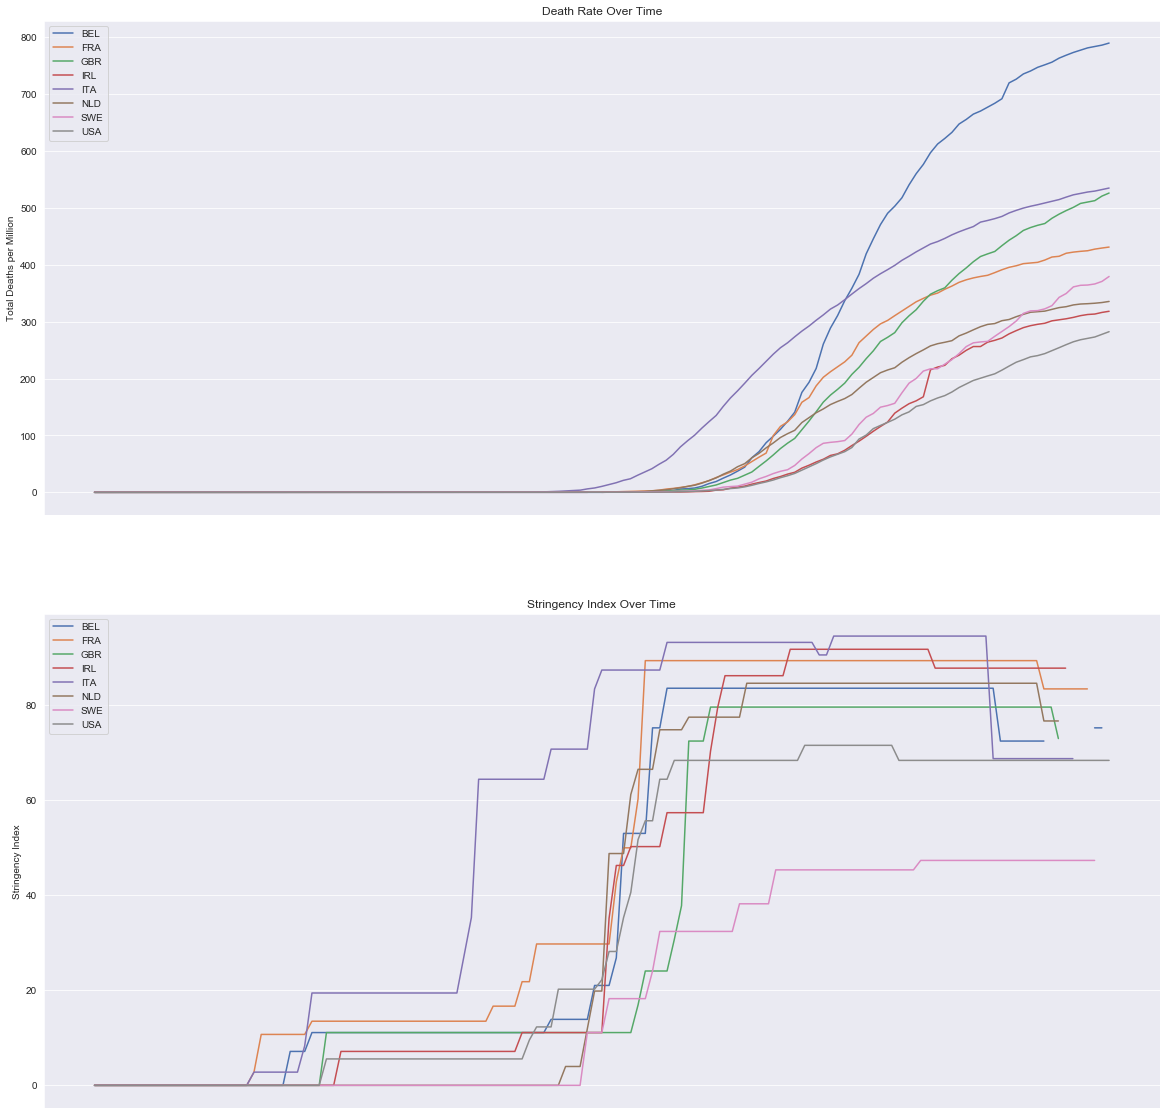

In [22]:
countrys = ['BEL','FRA','GBR','IRL','ITA','NLD','SWE','USA']
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
plt.subplot(2,1,1)
for country in countrys:
    plt.plot(df[df.iso_code == country].date, df[df.iso_code == country].total_deaths_per_million)
plt.legend(countrys)
plt.ylabel('Total Deaths per Million')
plt.xticks([])
plt.title('Death Rate Over Time')

plt.subplot(2,1,2)
for country in countrys:
    plt.plot(df[df.iso_code == country].date, df[df.iso_code == country].stringency_index)
plt.legend(countrys, loc=2)
plt.ylabel('Stringency Index')
plt.xticks([])
plt.title('Stringency Index Over Time')
plt.show()

**Percentage of Cases and Deaths in High Rate Countries**

Even between high rate countries there is a disparity between the numbers of those reported to of had COVID and those who then die from it. America for example has a high total death toll but also a large total population. Their cases are focused in hot spots and the large scale testing they have in operation means far more cases are found, confirmed and reported in the data. 

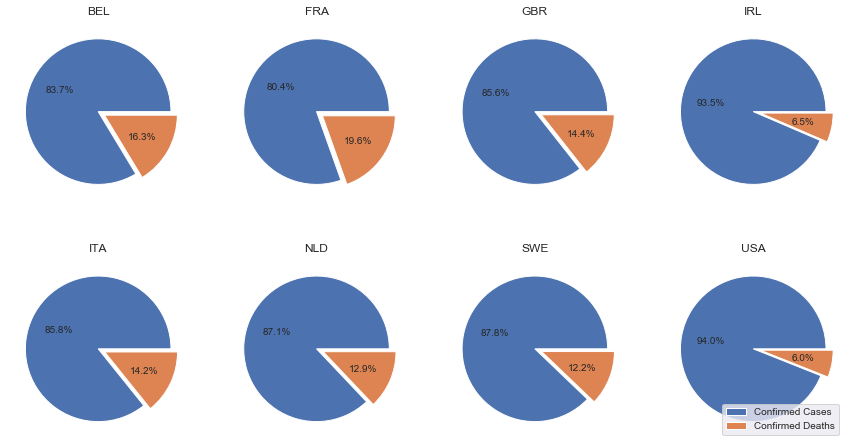

In [6]:
labels = ['Confirmed Cases','Confirmed Deaths']
explode = (0, 0.1)


sns.set_palette('deep')
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(15,8))
plt.legend(labels=labels)
i = 0
for ax in axes.flat:
    test_cases = most_recent[(most_recent.iso_code == countrys[i])].total_cases_minus_deaths.item()
    test_deaths = most_recent[(most_recent.iso_code == countrys[i])].total_deaths.item()
    lst = [test_cases,test_deaths]
    i = i+1
    ax.pie(lst, explode=explode, autopct='%0.1f%%')
    ax.set_title(countrys[i-1])
    plt.legend(labels=labels, loc=4)

Looking deeper, there doesn't seem to be any relation to the availability of hospital beds to death rates. Looking at a country's median age though, we can see that when compared to the low rate countries, it's far higher, roughly double in fact. It is known that the young seem to be far less effected by the virus that the old. There are certainly other factors at play, but the difference is stark and should be looked into further.

In [7]:
high_rates[['iso_code', 'median_age','hospital_beds_per_100k', 'total_deaths_per_million']]

,iso_code,median_age,hospital_beds_per_100k,total_deaths_per_million
1478,BEL,41.8,5.64,789.500
6114,FRA,42.0,5.98,430.986
6389,GBR,40.8,2.54,525.941
8386,IRL,38.7,2.96,318.158
9099,ITA,47.9,3.18,534.718
13167,NLD,43.2,3.32,335.456
16371,SWE,41.0,2.22,379.334
17794,USA,38.3,2.77,282.291


Taiwan is one of the few countries here that sticks out as having a high median age but is still in the low rate category. This can be explained, as they were one of the first countries to put in place a strict lockdown. The infection was never able to get into the population and spread as it did in Europe.

In [8]:
low_rates[['iso_code', 'median_age','hospital_beds_per_100k', 'total_deaths_per_million']]

,iso_code,median_age,hospital_beds_per_100k,total_deaths_per_million
253,AGO,16.8,NaN,0.091
1335,BDI,17.5,0.80,0.084
1544,BEN,18.8,0.50,0.165
2828,BWA,25.8,1.80,0.425
2895,CAF,18.3,1.00,0.000
3471,CIV,18.7,NaN,1.099
3611,COD,17.0,NaN,0.681
3913,CRI,33.6,1.13,1.963
5337,ERI,19.3,0.70,0.000
5717,ETH,19.8,0.30,0.043


If we plot just the high rates and low rates data for the countries median age, against total deaths per million, it doesn't tell us much. But if we plot all the countries, together there seems to be an increasing likely hood of high deaths as the median age increases.

Text(0.5, 1.0, 'All Countries')

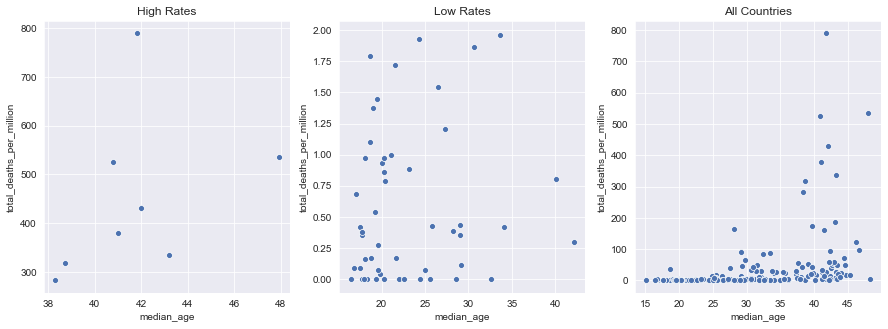

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(data=high_rates, y='total_deaths_per_million', x='median_age')
plt.title('High Rates')
plt.subplot(1,3,2)
sns.scatterplot(data=low_rates, y='total_deaths_per_million', x='median_age')
plt.title('Low Rates')
plt.subplot(1,3,3)
sns.scatterplot(data=most_recent, y='total_deaths_per_million', x='median_age')
plt.title('All Countries')

At this point in the pandemic, it seems that countries with a younger median age do seem on average to be fairing far better than countries with an older population. This is shown again below. Only countries with a higher median age have high reported cases and deaths.

There may still be a surge in deaths outside of Europe and America, with their older populations. Median age may not have as much of an effect, but for now, this what the current data has shown.

(-20, 600)

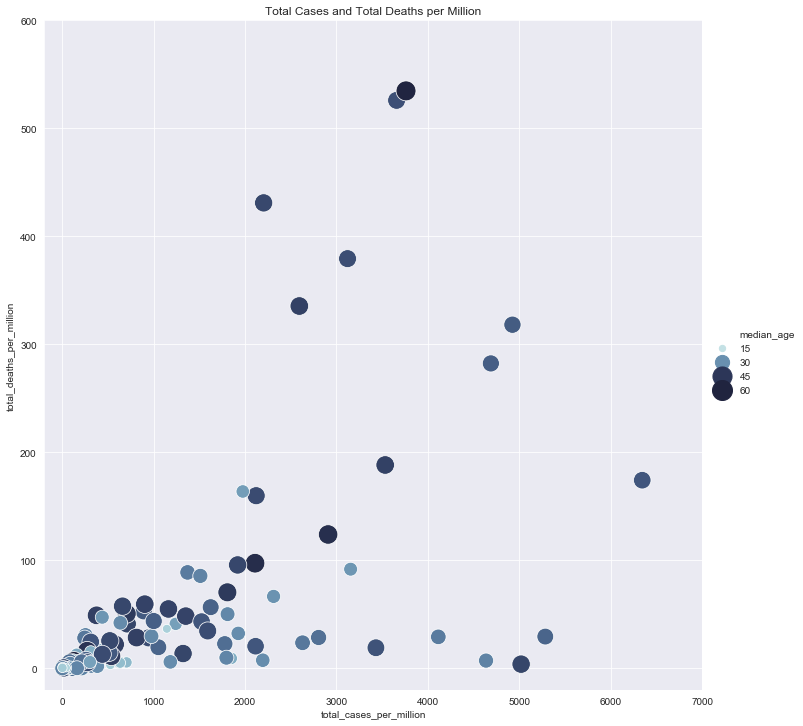

In [17]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(y="total_deaths_per_million", x="total_cases_per_million",size="median_age", hue="median_age", sizes=(40, 400), palette=cmap, height=10, data=most_recent)
plt.title('Total Cases and Total Deaths per Million')
plt.xlim(-200,7000)
plt.ylim(-20,600)

This is by no means an exhaustive study; it is intended only to be used as an aid to visualise some of the data that we currently have access to. Later, I hope more accurate and complete data will be compiled, that can show more conclusively why some countries have been worse effected than others, and leave useful insights and lessons in how we can better prepare in case of a future pandemic.